In [1]:
import os
import pandas as pd
from PIL import Image
from tempfile import NamedTemporaryFile
import numpy as np

#from IPython.display import Image

def readData():
    #Hack to get path of Notebook (Data file is in same directory structure)
    
    if '_dh' in globals():
        current_folder = globals()['_dh'][0]
    else:
        script_path=__file__
        current_folder=dirname(script_path)

    # Calculating path to the test data
    data_location = os.path.join(current_folder,'..' ,'data' , 'set1' , 'data.xlsx')
    data_location = os.path.normpath(data_location)
    df = pd.read_excel(data_location)
    return df

def getImage(imgId):
    #Hack to get path of Notebook (Data file is in same directory structure)
    
    if '_dh' in globals():
        current_folder = globals()['_dh'][0]
    else:
        script_path=__file__
        current_folder=dirname(script_path)
    img_path = os.path.join(current_folder,'..' ,'data' , 'set1' , 'capture',str(imgId)+'.png')
    img_path = os.path.normpath(img_path)
    im = Image.open(img_path)
    return im

def getProcessedImage(imgId):
    img=getImage(imgId)
    #Convert to Grayscale
    img=img.convert('L')
    #Resize to 128,128
    size=128,128
    #img.thumbnail(size)
    return img

def getFrames(sampleNum, seqSize):
    first_img = sampleNum - seqSize
    frames = []
    for id in range(first_img,sampleNum):
        frames.append(getProcessedImage(id))
    return frames

def getSampleGIF(sampleNum, seqSize):
    frames = getFrames(sampleNum, seqSize)
    tempFile = NamedTemporaryFile(suffix='.gif')    
    frames[0].save(tempFile, format='GIF', append_images=frames[1:], save_all=True, duration=50, loop=1)
    img=Image.open(tempFile)
    return img

In [2]:
df = readData()

In [3]:
frames=getFrames(300,30)

In [4]:
len(frames)

30

In [5]:
arr=[]
for f in frames:
    arr.append(np.array(f))

In [6]:
arr[0]


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [7]:
arr=np.array(arr)

In [8]:
arr.shape

(30, 502, 662)

In [13]:
img = getSampleGIF(312, 60)

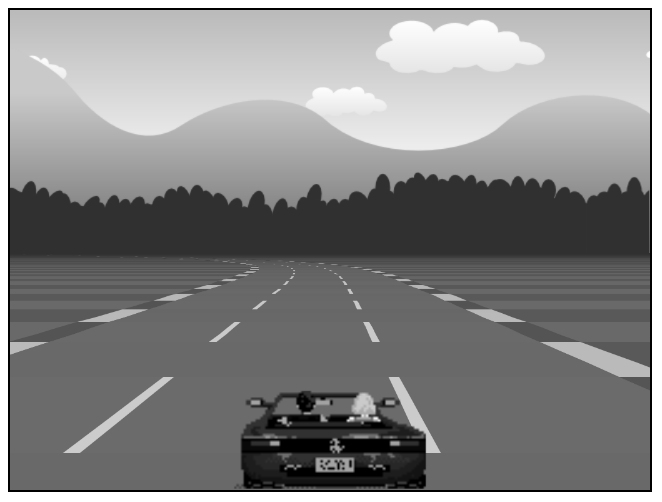

In [14]:
img